<a href="https://colab.research.google.com/github/Emily-Rouse/cosc470s24/blob/Solutions/Lab2solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The **Hello, world** of neural networks
This code builds a simple neural network that can recognize handwritten 28x28 pixel digits.

Our first version will have 15 neurons in the hidden layer and 10 output neurons.

See image below:
http://neuralnetworksanddeeplearning.com/images/tikz12.png

How many weights in this network?
11760 weights in the first layer (784 * 15) and 150 weights in the second layer (15 * 10) = 11910 weights total
15 biases in the hidden layer and 10 biases in the output layer = 25 biases total.
11910 + 25 = 11935 parameters!

In [ ]:
!git clone https://github.com/MichalDanielDobrzanski/DeepLearningPython nn
%cd nn

Cloning into 'nn'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 63 (delta 1), reused 3 (delta 0), pack-reused 55
Receiving objects: 100% (63/63), 16.43 MiB | 30.32 MiB/s, done.
Resolving deltas: 100% (28/28), done.
/content/nn


In [ ]:
import network
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
test_data = list(test_data)


In [ ]:
import numpy as np
print(np.shape(training_data))
print(np.shape(training_data[0][0]))
print(np.shape(training_data[0][1]))
print(training_data[0][1])

(50000, 2)
(784, 1)
(10, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [ ]:
# Solution for Lab 2
# Part 1 - Average digit darkness
# Step 1: Create a function that can calculate the darkness of an individual image
def image_darkness(pixeldata):
  dark_total = 0
  # Adds the value of every pixel into dark_total
  for d in pixeldata:
    dark_total += d
  return dark_total

# Step 2: Now call that function on all the images in the training_data to calculate TEN TOTAL DARKNESSES
# First question - Why will there be 10 darkness totals? - answer this question as a comment in your code.
# ANSWER: There will be 10 darkness totals because there will be one average darkness for each digit 0-9
darkness = image_darkness(training_data[0][0])
whichimage = np.argmax(training_data[0][1])
print(f"The first image was a {whichimage} and its darkness was {darkness}")

# define a 10-element list of darkness totals
darkness_totals = [0 for _ in range(10)]
# define a 10-elment list of digit counts
darkness_counts = [0 for _ in range(10)]

# iterate through each image and update the two data structures
for training_img in training_data:
  darkness = image_darkness(training_img[0])
  whichimage = np.argmax(training_img[1])
  darkness_totals[whichimage] += darkness
  darkness_counts[whichimage] += 1

# Step 3: Now calculate the averages for all ten digits
darkness_averages = [darkness_totals[i]/darkness_counts[i] for i in range(10)]

print(darkness_counts)
print(darkness_averages)



The first image was a 5 and its darkness was [107.51953]
[4932, 5678, 4968, 5101, 4859, 4506, 4951, 5175, 4842, 4988]
[array([135.86891], dtype=float32), array([59.660366], dtype=float32), array([116.29443], dtype=float32), array([110.87087], dtype=float32), array([95.2207], dtype=float32), array([100.346565], dtype=float32), array([107.38318], dtype=float32), array([89.8789], dtype=float32), array([117.880615], dtype=float32), array([96.04564], dtype=float32)]


In [ ]:
# Step 4: Use the averages to classify all 10,000 test images.
# Keep track of how many were predicted/classified accurately overall as well as for each individual digit.
# What were the top digit accuracies and which digits?
# ANSWER: The most accurate digits were 0 and 1, which had the highest average darkness and the lowest average darkness, respectively
def find_closest(darkness, darkness_averages):
  # Get the absolute value of darkness minus each darkness average and select the smallest
  counter = 0
  current_closest = (abs(darkness_averages[0] - darkness), counter)
  for digit_avg in darkness_averages:
    if abs(digit_avg - darkness) < current_closest[0]:
      current_closest = (abs(digit_avg - darkness), counter)
    counter += 1
  return current_closest[1]

correct_counts = [0 for _ in range(10)]
wrong_counts = [0 for _ in range(10)]

for imgdata, whichimage in test_data:
  darkness = image_darkness(imgdata)
  # see which darkness_average is closest to "darkness" and make that our classification for this image
  closest_digit = find_closest(darkness, darkness_averages)
  if closest_digit == whichimage:
    correct_counts[whichimage] += 1
  else:
    wrong_counts[whichimage] += 1

# now that we have our correct/wrong counts, turn that into accuracies
digit_accuracies = [correct_counts[i]/(correct_counts[i]+wrong_counts[i]) for i in range(10)]
print(digit_accuracies)

[0.5418367346938775, 0.8290748898678414, 0.04844961240310078, 0.048514851485148516, 0.048879837067209775, 0.0795964125560538, 0.06576200417536535, 0.28793774319066145, 0.13655030800821355, 0.04261645193260654]


In [ ]:
list_test_data = list(test_data)
print(np.shape(list_test_data))
print(np.shape(list_test_data[0]))
print(list_test_data[0][1])


(10000, 2)
(2,)
7


In [ ]:
# Part 2 - Simple neural network
net = network.Network([784, 30, 10])
net.SGD(training_data, 5, 10, 3.0, test_data=test_data)

Epoch 0 : 9031 / 10000
Epoch 1 : 9184 / 10000
Epoch 2 : 9302 / 10000
Epoch 3 : 9343 / 10000
Epoch 4 : 9327 / 10000


[0.9744897959183674, 0.9718061674008811, 0.9273255813953488, 0.9405940594059405, 0.9745417515274949, 0.8677130044843049, 0.9363256784968684, 0.943579766536965, 0.9229979466119097, 0.8572844400396432]


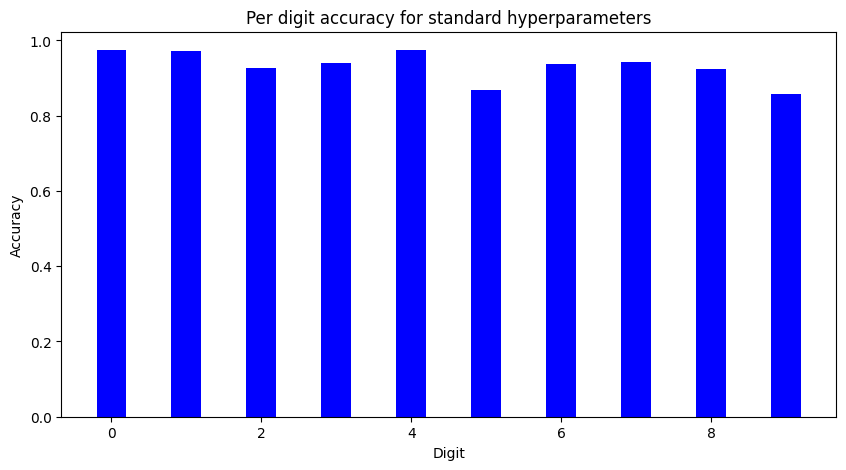

In [ ]:
# Per digit accuracy
import numpy as np
import matplotlib.pyplot as plt

a = net.feedforward(test_data[2][0])

correct_counts = [0 for _ in range(10)]
digit_counts = [0 for _ in range(10)]

for (x, y) in test_data:
  a = np.argmax(net.feedforward(x))
  if a == y:
    correct_counts[y] += 1
  digit_counts[y] += 1

accuracies = [correct_counts[i]/digit_counts[i] for i in range(10)]
print(accuracies)

# Plot the per digit accuracy
fig = plt.figure(figsize = (10, 5))
plt.bar(range(0,10), accuracies, color ='blue',
        width = 0.4)
plt.xlabel("Digit")
plt.ylabel("Accuracy")
plt.title("Per digit accuracy for standard hyperparameters")
plt.show()

In [ ]:
# Part 3 - Exploring impact of hyper-parameters
import time

# Helper function to find total accuracy for a model
def findaccuracy (a):
  correct_counts = [0 for _ in range(10)]
  digit_counts = [0 for _ in range(10)]

  for (x, y) in test_data:
    a = np.argmax(net.feedforward(x))
    if a == y:
      correct_counts[y] += 1
    digit_counts[y] += 1

  accuracies = [correct_counts[i]/digit_counts[i] for i in range(10)]
  return sum(accuracies)/len(accuracies)

# Step 1 - vary the number of training epochs from 5 to 60 as follows: 5, 15, 30, 60
accuracies = [0 for _ in range(4)]
trainingtime = [0 for _ in range(4)]

# Step 1A - epochs = 5
startingtime = time.perf_counter()
net = network.Network([784, 30, 10])
net.SGD(training_data, 5, 10, 3.0, test_data=test_data)
a = net.feedforward(test_data[2][0])
accuracies[0] = findaccuracy(a)
trainingtime[0] = time.perf_counter() - startingtime
print(accuracies[0])
print(trainingtime[0])

# Step 1B - epochs = 15
startingtime = time.perf_counter()
net = network.Network([784, 30, 10])
net.SGD(training_data, 15, 10, 3.0, test_data=test_data)
a = net.feedforward(test_data[2][0])
accuracies[1] = findaccuracy(a)
trainingtime[1] = time.perf_counter() - startingtime
print(accuracies[1])
print(trainingtime[1])

# Step 1C - epochs = 30
startingtime = time.perf_counter()
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)
a = net.feedforward(test_data[2][0])
accuracies[2] = findaccuracy(a)
trainingtime[2] = time.perf_counter() - startingtime
print(accuracies[2])
print(trainingtime[2])

# Step 1D - epochs = 60
startingtime = time.perf_counter()
net = network.Network([784, 30, 10])
net.SGD(training_data, 60, 10, 3.0, test_data=test_data)
a = net.feedforward(test_data[2][0])
accuracies[3] = findaccuracy(a)
trainingtime[3] = time.perf_counter() - startingtime
print(accuracies[3])
print(trainingtime[3])

Epoch 0 : 8196 / 10000
Epoch 1 : 8322 / 10000
Epoch 2 : 8369 / 10000
Epoch 3 : 8404 / 10000
Epoch 4 : 9321 / 10000
0.9310607210862148
66.87859996500083
Epoch 0 : 8989 / 10000
Epoch 1 : 9276 / 10000
Epoch 2 : 9320 / 10000
Epoch 3 : 9402 / 10000
Epoch 4 : 9421 / 10000
Epoch 5 : 9398 / 10000
Epoch 6 : 9435 / 10000
Epoch 7 : 9456 / 10000
Epoch 8 : 9488 / 10000
Epoch 9 : 9485 / 10000
Epoch 10 : 9491 / 10000
Epoch 11 : 9503 / 10000
Epoch 12 : 9495 / 10000
Epoch 13 : 9511 / 10000
Epoch 14 : 9481 / 10000
0.9474767759756437
195.68465106900112
Epoch 0 : 9108 / 10000
Epoch 1 : 9244 / 10000
Epoch 2 : 9316 / 10000
Epoch 3 : 9343 / 10000
Epoch 4 : 9361 / 10000
Epoch 5 : 9417 / 10000
Epoch 6 : 9380 / 10000
Epoch 7 : 9443 / 10000
Epoch 8 : 9419 / 10000
Epoch 9 : 9451 / 10000
Epoch 10 : 9452 / 10000
Epoch 11 : 9451 / 10000
Epoch 12 : 9473 / 10000
Epoch 13 : 9482 / 10000
Epoch 14 : 9480 / 10000
Epoch 15 : 9495 / 10000
Epoch 16 : 9469 / 10000
Epoch 17 : 9483 / 10000
Epoch 18 : 9459 / 10000
Epoch 19 : 949

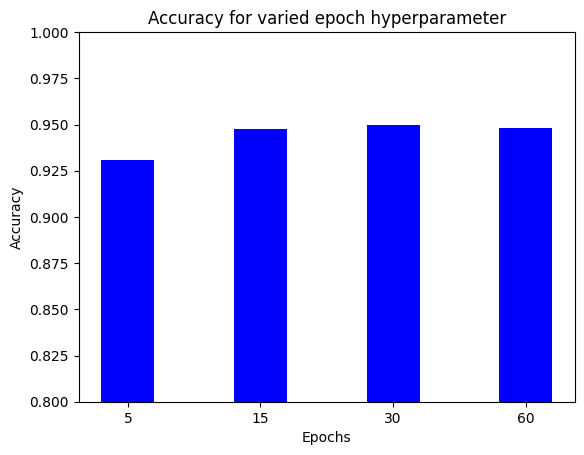

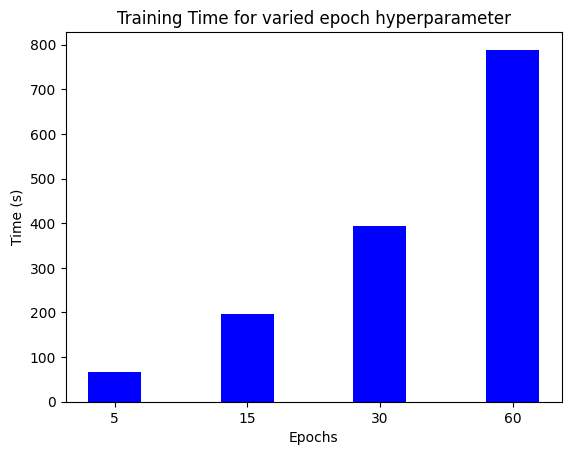

In [ ]:
# Part 3, Step 1 chart
# Chart the accuracy and time for each epoch test
barwidth = 0.4
epochlabels = ["5", "15", "30", "60"]

# Plot the accuracy
fig, ax = plt.subplots()

ax.bar(np.arange(len(epochlabels)), accuracies, color='blue', width=barwidth)
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")
ax.set_xticks(np.arange(len(epochlabels)))
ax.set_xticklabels(epochlabels)
ax.set_title("Accuracy for varied epoch hyperparameter")
# Set the y-axis scale to start from 0.8
ax.set_ylim(0.8, 1.0)

plt.show()

# Plot the time to train
fig, ax = plt.subplots()

ax.bar(np.arange(len(epochlabels)), trainingtime, color='blue', width=barwidth)
ax.set_xlabel("Epochs")
ax.set_ylabel("Time (s)")
ax.set_xticks(np.arange(len(epochlabels)))
ax.set_xticklabels(epochlabels)
ax.set_title("Training Time for varied epoch hyperparameter")


plt.show()

In [ ]:
# Step 2 - vary the batch size from 5 to 100 as follows: 5, 10, 50, 100
accuracies2 = [0 for _ in range(4)]
trainingtime2 = [0 for _ in range(4)]

# Step 2A - batch size = 5
startingtime = time.perf_counter()
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 5, 3.0, test_data=test_data)
a = net.feedforward(test_data[2][0])
accuracies2[0] = findaccuracy(a)
trainingtime2[0] = time.perf_counter() - startingtime
print(accuracies2[0])
print(trainingtime2[0])

# Step 2B - batch size = 10
startingtime = time.perf_counter()
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)
a = net.feedforward(test_data[2][0])
accuracies2[1] = findaccuracy(a)
trainingtime2[1] = time.perf_counter() - startingtime
print(accuracies2[1])
print(trainingtime2[1])

# Step 2C - batch size = 50
startingtime = time.perf_counter()
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 50, 3.0, test_data=test_data)
a = net.feedforward(test_data[2][0])
accuracies2[2] = findaccuracy(a)
trainingtime2[2] = time.perf_counter() - startingtime
print(accuracies2[2])
print(trainingtime2[2])

# Step 2D - batch size = 100
startingtime = time.perf_counter()
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 100, 3.0, test_data=test_data)
a = net.feedforward(test_data[2][0])
accuracies2[3] = findaccuracy(a)
trainingtime2[3] = time.perf_counter() - startingtime
print(accuracies2[3])
print(trainingtime2[3])

Epoch 0 : 9122 / 10000
Epoch 1 : 9183 / 10000
Epoch 2 : 9284 / 10000
Epoch 3 : 9350 / 10000
Epoch 4 : 9350 / 10000
Epoch 5 : 9396 / 10000
Epoch 6 : 9345 / 10000
Epoch 7 : 9404 / 10000
Epoch 8 : 9399 / 10000
Epoch 9 : 9438 / 10000
Epoch 10 : 9424 / 10000
Epoch 11 : 9456 / 10000
Epoch 12 : 9472 / 10000
Epoch 13 : 9478 / 10000
Epoch 14 : 9500 / 10000
Epoch 15 : 9497 / 10000
Epoch 16 : 9459 / 10000
Epoch 17 : 9472 / 10000
Epoch 18 : 9493 / 10000
Epoch 19 : 9510 / 10000
Epoch 20 : 9475 / 10000
Epoch 21 : 9516 / 10000
Epoch 22 : 9502 / 10000
Epoch 23 : 9476 / 10000
Epoch 24 : 9488 / 10000
Epoch 25 : 9493 / 10000
Epoch 26 : 9507 / 10000
Epoch 27 : 9474 / 10000
Epoch 28 : 9503 / 10000
Epoch 29 : 9505 / 10000
0.9497748214951682
420.75651202599875
Epoch 0 : 9011 / 10000
Epoch 1 : 9238 / 10000
Epoch 2 : 9265 / 10000
Epoch 3 : 9338 / 10000
Epoch 4 : 9359 / 10000
Epoch 5 : 9387 / 10000
Epoch 6 : 9406 / 10000
Epoch 7 : 9409 / 10000
Epoch 8 : 9422 / 10000
Epoch 9 : 9420 / 10000
Epoch 10 : 9442 / 1000

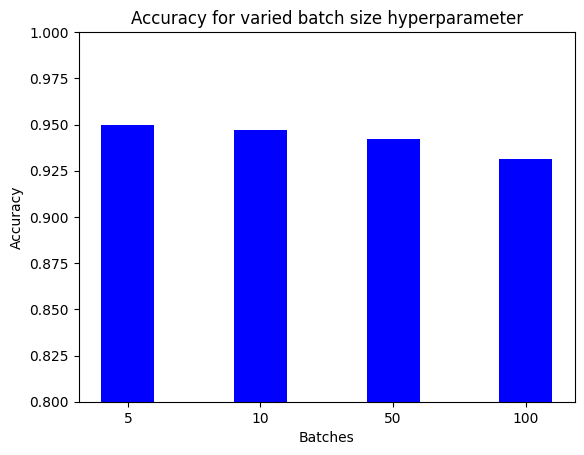

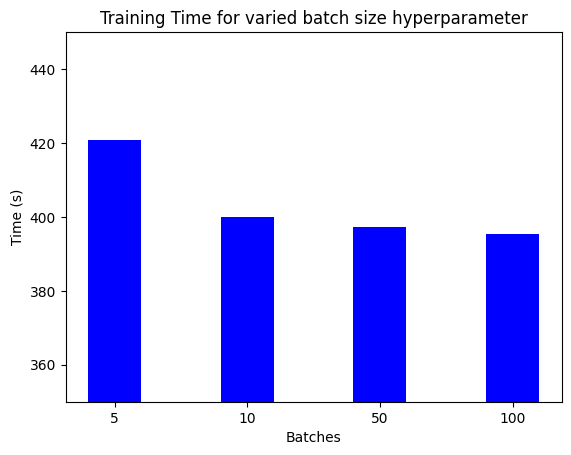

In [ ]:
# Part 3, Step 2 chart
# Chart the accuracy and time for each batch size test
barwidth = 0.4
batchlabels = ["5", "10", "50", "100"]

# Plot the accuracy
fig, ax = plt.subplots()

ax.bar(np.arange(len(batchlabels)), accuracies2, color='blue', width=barwidth)
ax.set_xlabel("Batches")
ax.set_ylabel("Accuracy")
ax.set_xticks(np.arange(len(batchlabels)))
ax.set_xticklabels(batchlabels)
ax.set_title("Accuracy for varied batch size hyperparameter")
# Set the y-axis scale to start from 0.8
ax.set_ylim(0.8, 1.0)

plt.show()

# Plot the time to train
fig, ax = plt.subplots()

ax.bar(np.arange(len(batchlabels)), trainingtime2, color='blue', width=barwidth)
ax.set_xlabel("Batches")
ax.set_ylabel("Time (s)")
ax.set_xticks(np.arange(len(batchlabels)))
ax.set_xticklabels(batchlabels)
ax.set_title("Training Time for varied batch size hyperparameter")

ax.set_ylim(350, 450)

plt.show()

In [ ]:
# Step 3 - vary the learning rate from 1.0 to 5.0 as follows: 1.0, 3.0, 5.0
accuracies3 = [0 for _ in range(3)]
trainingtime3 = [0 for _ in range(3)]

# Step 3A - learning rate = 1.0
startingtime = time.perf_counter()
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 10, 1.0, test_data=test_data)
a = net.feedforward(test_data[2][0])
accuracies3[0] = findaccuracy(a)
trainingtime3[0] = time.perf_counter() - startingtime
print(accuracies3[0])
print(trainingtime3[0])

# Step 3B - learning rate = 3.0
startingtime = time.perf_counter()
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)
a = net.feedforward(test_data[2][0])
accuracies3[1] = findaccuracy(a)
trainingtime3[1] = time.perf_counter() - startingtime
print(accuracies3[1])
print(trainingtime3[1])

# Step 3C - learning rate = 5.0
startingtime = time.perf_counter()
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 10, 5.0, test_data=test_data)
a = net.feedforward(test_data[2][0])
accuracies3[2] = findaccuracy(a)
trainingtime3[2] = time.perf_counter() - startingtime
print(accuracies3[2])
print(trainingtime3[2])

Epoch 0 : 8752 / 10000
Epoch 1 : 9038 / 10000
Epoch 2 : 9150 / 10000
Epoch 3 : 9185 / 10000
Epoch 4 : 9266 / 10000
Epoch 5 : 9284 / 10000
Epoch 6 : 9301 / 10000
Epoch 7 : 9332 / 10000
Epoch 8 : 9346 / 10000
Epoch 9 : 9352 / 10000
Epoch 10 : 9360 / 10000
Epoch 11 : 9371 / 10000
Epoch 12 : 9385 / 10000
Epoch 13 : 9389 / 10000
Epoch 14 : 9408 / 10000
Epoch 15 : 9392 / 10000
Epoch 16 : 9401 / 10000
Epoch 17 : 9414 / 10000
Epoch 18 : 9400 / 10000
Epoch 19 : 9406 / 10000
Epoch 20 : 9409 / 10000
Epoch 21 : 9405 / 10000
Epoch 22 : 9405 / 10000
Epoch 23 : 9412 / 10000
Epoch 24 : 9404 / 10000
Epoch 25 : 9419 / 10000
Epoch 26 : 9425 / 10000
Epoch 27 : 9423 / 10000
Epoch 28 : 9410 / 10000
Epoch 29 : 9416 / 10000
0.9410567133484491
409.59938658899955
Epoch 0 : 9129 / 10000
Epoch 1 : 9240 / 10000
Epoch 2 : 9329 / 10000
Epoch 3 : 9381 / 10000
Epoch 4 : 9397 / 10000
Epoch 5 : 9404 / 10000
Epoch 6 : 9441 / 10000
Epoch 7 : 9459 / 10000
Epoch 8 : 9431 / 10000
Epoch 9 : 9452 / 10000
Epoch 10 : 9496 / 1000

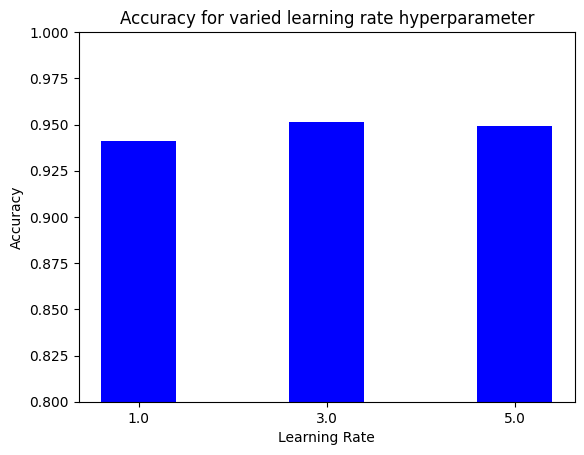

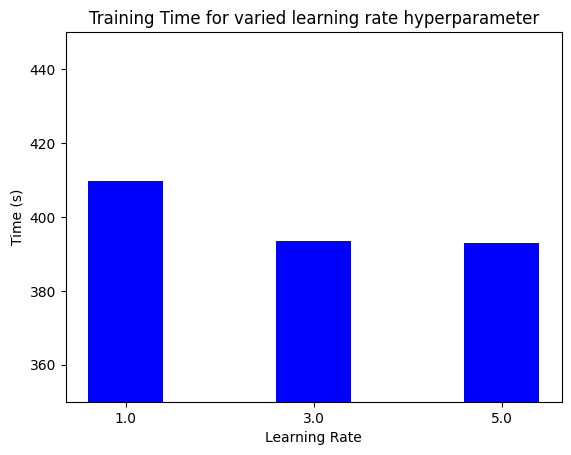

In [ ]:
# Part 3, Step 3 chart
# Chart the accuracy and time for each learning rate test
barwidth = 0.4
learnlabels = ["1.0", "3.0", "5.0"]

# Plot the accuracy
fig, ax = plt.subplots()

ax.bar(np.arange(len(learnlabels)), accuracies3, color='blue', width=barwidth)
ax.set_xlabel("Learning Rate")
ax.set_ylabel("Accuracy")
ax.set_xticks(np.arange(len(learnlabels)))
ax.set_xticklabels(learnlabels)
ax.set_title("Accuracy for varied learning rate hyperparameter")
# Set the y-axis scale to start from 0.8
ax.set_ylim(0.8, 1.0)

plt.show()

# Plot the time to train
fig, ax = plt.subplots()

ax.bar(np.arange(len(learnlabels)), trainingtime3, color='blue', width=barwidth)
ax.set_xlabel("Learning Rate")
ax.set_ylabel("Time (s)")
ax.set_xticks(np.arange(len(learnlabels)))
ax.set_xticklabels(learnlabels)
ax.set_title("Training Time for varied learning rate hyperparameter")

ax.set_ylim(350, 450)

plt.show()

In [ ]:
print(np.shape(net.weights[0]))
print(net.weights[0])

(30, 784)
[[ 0.45745312 -0.43668441  0.06388325 ... -0.01876614  0.69747384
   1.75032045]
 [ 0.31008606 -1.31462574 -0.95998785 ...  2.07556124 -0.23319521
  -0.5521895 ]
 [ 2.62684071  0.59619412  0.75105954 ...  0.39065436  0.21883096
  -0.15008028]
 ...
 [ 0.12553374  1.12652397 -0.19640291 ... -1.06957326 -0.38014393
   2.12662076]
 [-0.33401933 -0.27315002 -0.64691649 ...  0.57483904 -1.0439243
  -0.26700133]
 [-2.64108907  0.69231545 -1.57468679 ... -0.20718688  0.5363602
   0.16273624]]


In [ ]:
print(np.shape(net.weights[1]))
print(net.weights[1])

(10, 30)
[[ 8.92742895e-02 -9.53000886e-01 -4.57105149e-01  8.12327680e-01
  -1.66712716e+00 -3.52723344e+00  2.43366417e+00 -1.17334118e+00
   8.58573096e-01 -6.38617216e-01 -3.98845904e+00  2.60882754e+00
  -3.45033814e+00 -4.68697776e+00 -2.93102636e-02 -2.10035207e+00
  -1.34230789e+00 -6.94064697e-01 -1.19457306e+00 -2.29509311e+00
   3.69451831e+00 -5.47055566e-01  2.43794816e+00 -1.72272752e+00
   2.40744671e-01  1.47444250e+00 -1.05438717e+00 -1.86542911e+00
  -1.06224867e-01 -2.56395561e+00]
 [-7.34977609e-01  4.91942640e+00 -1.66675986e+00  1.59401840e+00
  -2.16068409e+00 -1.51479916e+00 -1.24537721e+00 -1.68016775e+00
   3.37529651e+00 -2.55192130e-01 -6.61492715e-01 -1.81183859e+00
   1.68476200e+00 -3.24190509e-01  1.90014317e+00  1.24494728e+00
  -4.40024242e+00 -1.63853095e+00 -2.36185595e+00 -8.24469577e-01
  -1.22617148e+00 -2.62641360e-01 -3.39598402e+00  1.40744340e+00
  -1.83806995e+00 -7.40020693e-01 -1.30620128e+00  1.84904317e+00
  -2.15747635e+00  7.20940625e-0